In [20]:
from numgrids import *
import numpy as np
from numpy import exp, sin, cos
import matplotlib.pyplot as plt

## Differentiation in 1D

In [34]:
def f(x):
    return exp(sin(x))

def df_dx(x):
    return cos(x)*f(x)


def g(x):
    return exp(x)*sin(2*x)

def dg_dx(x):
    return (2*cos(2*x) + sin(2*x)) * exp(x)

### Equidistant non-periodic grids

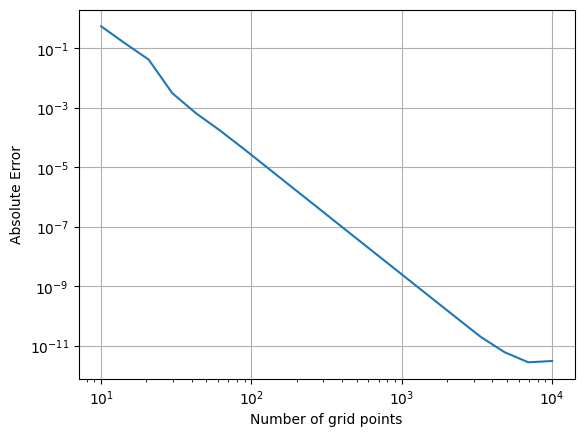

In [35]:
errors = []
num_points = np.logspace(1, 4, 20)

for npoints in num_points:

    axis = Axis.of_type(AxisType.EQUIDISTANT, int(npoints), 0, 2*np.pi)
    grid = Grid(axis)

    d_dx = Diff(grid, 1)
    
    x = axis.coords
    ff = f(x)
    
    dff_dx = d_dx(ff)
    
    exact = df_dx(x)
    
    error = np.max(np.abs(exact - dff_dx))
    errors.append(error)
    

plt.loglog(num_points, errors)
plt.xlabel("Number of grid points")
plt.ylabel("Absolute Error")
plt.grid()
    

### Equidistant periodic grids

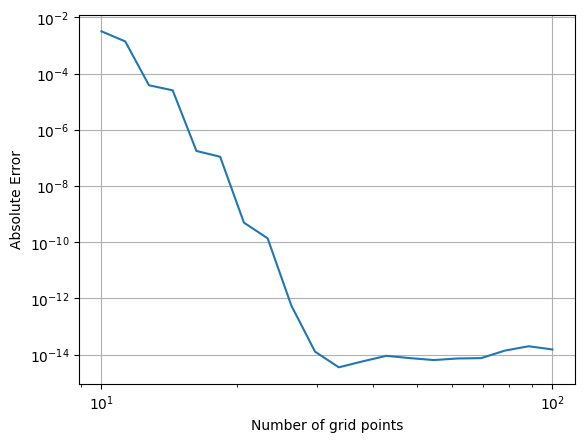

In [36]:
errors = []
num_points = np.logspace(1, 2, 20)

for npoints in num_points:

    axis = Axis.of_type(AxisType.EQUIDISTANT_PERIODIC, int(npoints), 0, 2*np.pi)
    grid = Grid(axis)

    d_dx = Diff(grid, 1)
    
    x = axis.coords
    ff = f(x)
    
    dff_dx = d_dx(ff)
    
    exact = df_dx(x)
    
    error = np.max(np.abs(exact - dff_dx))
    errors.append(error)
    

plt.loglog(num_points, errors)
plt.xlabel("Number of grid points")
plt.ylabel("Absolute Error")
plt.grid()
    

The `Diff` class uses spectral FFT differentiation by default when taking the derivative with respect to a **periodic**, equidistant axis. Note that this only makes sense when the underlying data is periodic indeed, or if the data goes to zero at the boundaries sufficiently fast. Otherwise taking the derivative will give large errors, as is typical for FFT-based methods when applying the to non-periodic data (Gibbs phenomenon). But if you data **is** periodic, then you get the spectacular accuracy for which spectral methods are well known and which you can see in the plot above. With only 30 grid points we have reached machine precision, something for which we would need many thousands or millions of grid points using other schemes like finite differences, for example.

### Non-equidistant Chebyshev grids

What can you do if you don't have periodic data and thus cannot apply the FFT-based derivative suitable for periodic grids? Well, if you still want spectral accuracy, just use a non-equidistant grid like the Chebyshev grid! Let's see how we can do this for the **non-periodic** function $g(x)$:

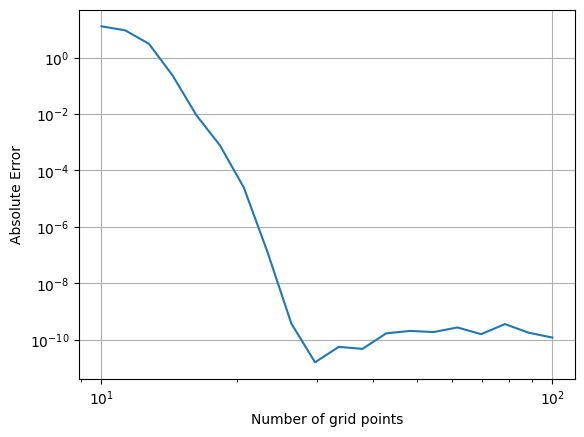

In [37]:
errors = []
num_points = np.logspace(1, 2, 20)

for npoints in num_points:

    axis = Axis.of_type(AxisType.CHEBYSHEV, int(npoints), 0, 2*np.pi)
    grid = Grid(axis)

    d_dx = Diff(grid, 1)
    
    x = axis.coords
    gg = g(x)
    
    dgg_dx = d_dx(gg)
    
    exact = dg_dx(x)
    
    error = np.max(np.abs(exact - dgg_dx))
    errors.append(error)
    

plt.loglog(num_points, errors)
plt.xlabel("Number of grid points")
plt.ylabel("Absolute Error")
plt.grid()
    

Again, you can see the spectacular spectral accuracy. We just need 30 grid points to reach machine precision! But this time, the differentiation is not based on a FFT-based spectral method, but on Chebyshev spectral methods. The price we have to pay is that we have to use a non-equidistant grid with points lying denser at the boundary than in the interior.

## Differentiation in Multiple Dimensions